In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras import callbacks

In [2]:
data = pd.read_csv(r"C:\Users\User\Desktop\Homework\S5\PRO1\star_classification.csv")
data.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [3]:
data.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Text(0.5, 1.0, 'Correlation Map Of Stellar')

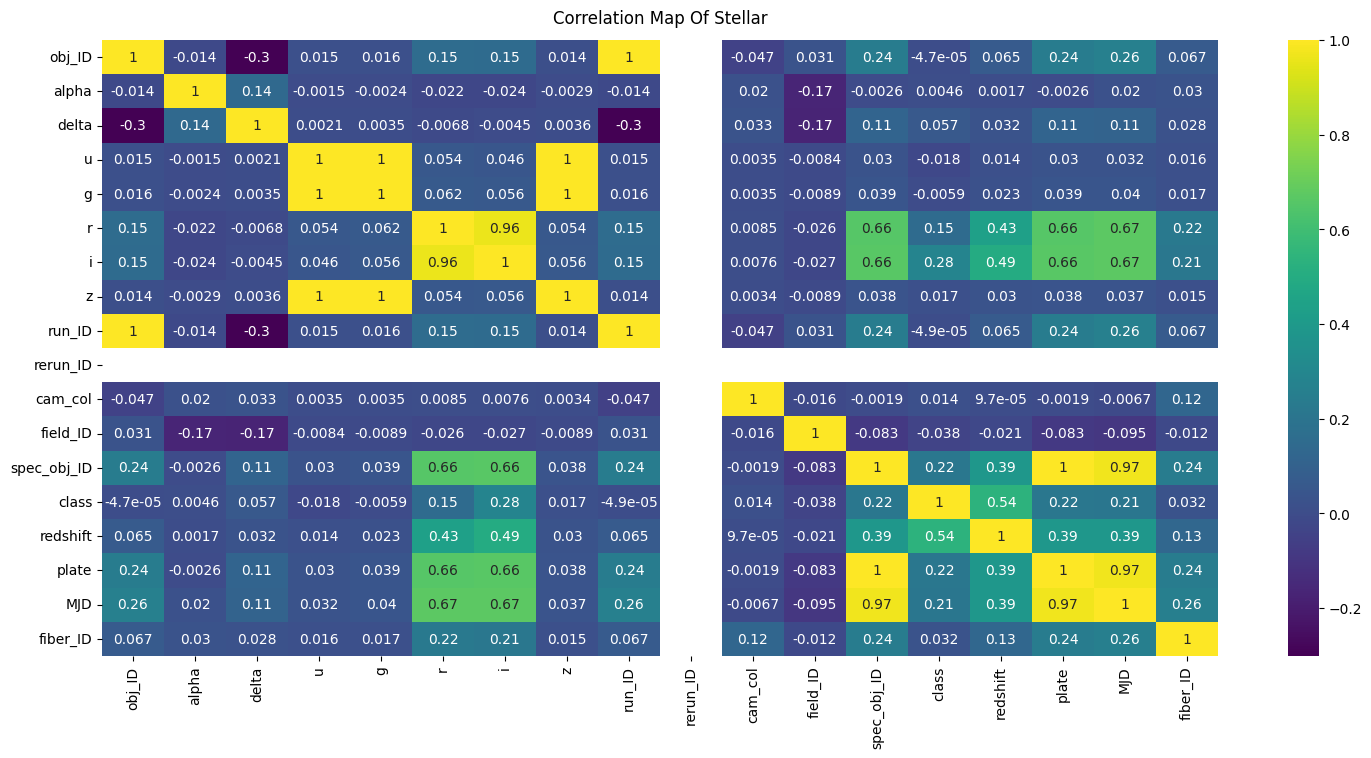

In [6]:
data["class"] = data["class"].map({"GALAXY":0,"STAR":1,"QSO":2})
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Map Of Stellar', fontdict={'fontsize':12}, pad=12)

<AxesSubplot: xlabel='redshift', ylabel='i'>

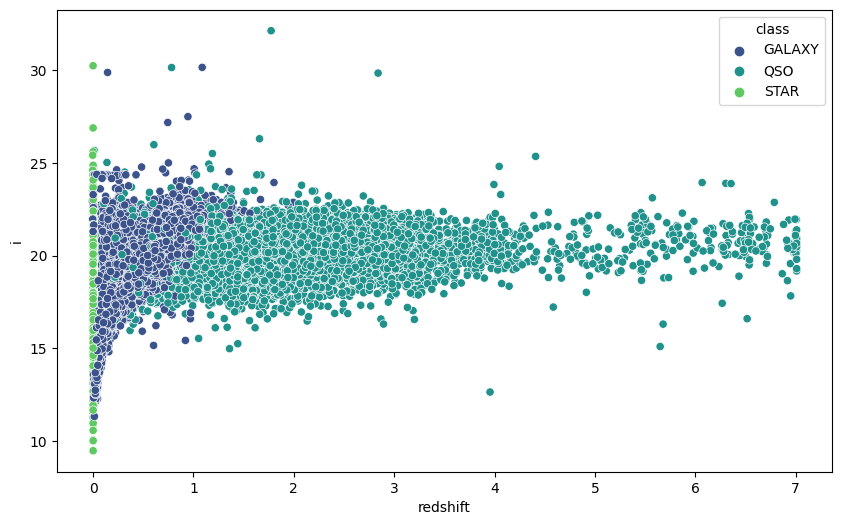

In [7]:
data["class"] = data["class"].map({0:"GALAXY",1:"STAR",2:"QSO"})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='redshift', y='i', data= data, hue='class', palette='viridis')

In [8]:
y = data['class']
x = data.drop('class', axis = 1)

[Text(0, 0, '59445'), Text(0, 0, '18961'), Text(0, 0, '21594')]

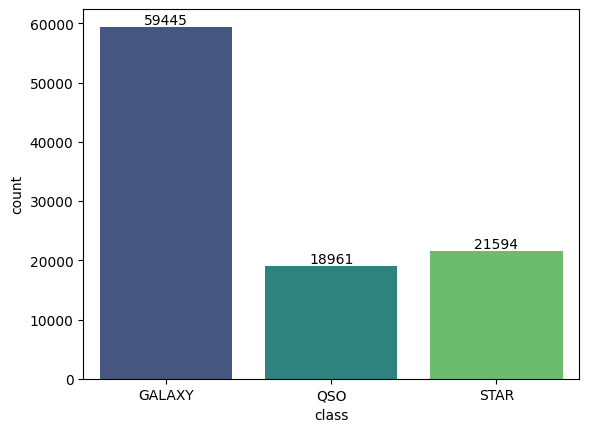

In [9]:
ax=sns.countplot(x=y, palette='viridis')
ax.bar_label(ax.containers[0])

In [10]:
x, check_x, y, check_y = train_test_split(x, y, stratify = y, test_size = 0.01, random_state = 1111)

In [11]:
x.drop(['rerun_ID', 'obj_ID', 'run_ID', 'cam_col', 'field_ID', 'fiber_ID'], axis = 1, inplace = True)
check_x.drop(['rerun_ID', 'obj_ID', 'run_ID', 'cam_col', 'field_ID', 'fiber_ID'], axis = 1, inplace = True)
x

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
38851,208.798164,2.944741,24.09374,20.56471,18.86435,18.16352,17.76046,4.544326e+18,0.343663,4036,55330
84206,237.936317,45.565394,20.14418,18.03549,16.95201,16.49305,16.12734,1.315062e+18,0.119189,1168,52731
27405,148.780320,3.364285,21.81948,21.18008,21.12888,21.02730,20.91263,5.333541e+18,-0.000050,4737,55630
98084,246.742342,34.349422,23.22951,20.32641,18.82489,18.25906,17.91722,1.190081e+18,0.270118,1057,52522
870,136.737715,2.026072,22.33495,21.63192,20.42965,19.46220,19.19823,4.300009e+18,0.639300,3819,55540
...,...,...,...,...,...,...,...,...,...,...,...
36433,341.602342,0.065167,18.68082,16.79230,15.86380,15.42713,15.05921,4.256301e+17,0.000000,378,52146
16114,137.752433,13.531102,24.53724,21.56537,19.94696,19.17290,18.79141,5.965282e+18,0.421594,5298,55979
82571,235.988539,3.982020,20.53414,20.19019,19.94367,19.66788,19.99394,3.321476e+18,0.127595,2950,54559
76733,330.120999,19.354105,21.45044,20.05323,19.80503,19.74838,20.01406,8.525501e+18,-0.000472,7572,56944


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 1234)

In [13]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(x_train, y_train)
    
    y_pred_train = pipe_knn.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.9306060606060607 Best K-Score 3


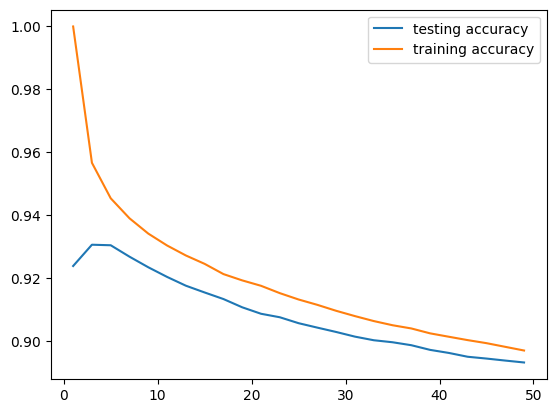

In [14]:
f, ax = plt.subplots(1, 1)
sns.lineplot(x = k, y = testing_accuracy, label="testing accuracy")
sns.lineplot(x = k, y = training_accuracy, label="training accuracy")
ax.legend()

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3, leaf_size = 1)
estimator = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])

hyperparam_space = {
    'knn__n_neighbors': [1,2,3,4,5],
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(
                estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'accuracy',
                n_jobs = -1)

grid.fit(x_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9295815295815295
best param {'knn__n_neighbors': 4, 'knn__weights': 'distance'}


In [16]:
estimator.fit(x_train, y_train)
y_pred_estimator = estimator.predict(x_test)
print(classification_report(y_test, y_pred_estimator))

              precision    recall  f1-score   support

      GALAXY       0.93      0.96      0.94     17655
         QSO       0.96      0.86      0.91      5631
        STAR       0.92      0.90      0.91      6414

    accuracy                           0.93     29700
   macro avg       0.94      0.91      0.92     29700
weighted avg       0.93      0.93      0.93     29700



In [17]:
grid.best_estimator_.fit(x_train, y_train)
y_pred_grid = grid.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

      GALAXY       0.93      0.96      0.95     17655
         QSO       0.96      0.86      0.91      5631
        STAR       0.92      0.91      0.92      6414

    accuracy                           0.93     29700
   macro avg       0.94      0.91      0.92     29700
weighted avg       0.93      0.93      0.93     29700



In [18]:
print(classification_report(check_y, grid.best_estimator_.predict(check_x)))

              precision    recall  f1-score   support

      GALAXY       0.94      0.97      0.96       594
         QSO       0.95      0.87      0.91       190
        STAR       0.95      0.94      0.94       216

    accuracy                           0.94      1000
   macro avg       0.95      0.93      0.94      1000
weighted avg       0.95      0.94      0.94      1000



Teraz czas na sieć neuronową:

In [19]:
names = x.columns
scaler = MinMaxScaler()
norm_x = pd.DataFrame(scaler.fit_transform(x), columns=names)
norm_x.head(10)

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,0.579989,0.213488,0.999134,0.998900,0.457842,0.383459,0.998841,0.306985,0.050366,0.306978,0.508192
1,0.660929,0.632217,0.998740,0.998647,0.361013,0.309778,0.998678,0.073444,0.018396,0.073447,0.153332
2,0.413270,0.217610,0.998907,0.998961,0.572503,0.509775,0.999155,0.364061,0.001413,0.364058,0.549153
3,0.685391,0.522025,0.999048,0.998876,0.455844,0.387673,0.998857,0.064406,0.039892,0.064408,0.124795
4,0.379818,0.204463,0.998959,0.999006,0.537098,0.440741,0.998984,0.289316,0.092473,0.289309,0.536865
5,0.134513,0.181874,0.998748,0.998820,0.492213,0.434031,0.998993,0.011887,0.224113,0.011888,0.088749
6,0.467603,0.164095,0.999064,0.998974,0.556928,0.492665,0.999098,0.286784,0.224581,0.286784,0.496723
7,0.912780,0.097166,0.998679,0.998640,0.368525,0.319689,0.998706,0.036645,0.019330,0.036642,0.081240
8,0.905746,0.184561,0.998764,0.998697,0.383987,0.329096,0.998723,0.058952,0.024697,0.058953,0.117013
9,0.681517,0.306499,0.999188,0.998837,0.460036,0.394857,0.998920,0.309502,0.001403,0.309502,0.512425


In [20]:
n_check_x = pd.DataFrame(scaler.fit_transform(check_x), columns=names)
n_check_x.head(10)

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,0.366739,0.508794,0.723612,0.763580,0.778857,0.838730,0.890444,0.828129,0.142503,0.828126,0.890333
1,0.343020,0.448991,0.201816,0.231751,0.250356,0.291160,0.286518,0.076581,0.007884,0.076589,0.139676
2,0.643583,0.229537,0.369704,0.392629,0.409981,0.468860,0.456754,0.123241,0.016907,0.123247,0.396072
3,0.610988,0.619648,0.540597,0.546440,0.457523,0.487210,0.453183,0.087242,0.074736,0.087249,0.195409
4,0.905424,0.177658,0.379870,0.382013,0.363564,0.401376,0.379354,0.053956,0.026542,0.053957,0.105933
5,0.075817,0.164338,0.299348,0.352730,0.367569,0.416789,0.408041,0.005733,0.020744,0.005740,0.013000
6,0.671975,0.373013,0.787497,0.773779,0.680292,0.697961,0.657335,0.294543,0.108233,0.294547,0.502420
7,0.575359,0.695325,0.522003,0.636845,0.663598,0.760903,0.714823,0.582136,0.385657,0.582124,0.755497
8,0.560315,0.885689,0.854427,0.744546,0.666946,0.675596,0.636511,0.532526,0.113127,0.532513,0.656894
9,0.981699,0.305907,0.444314,0.588980,0.642906,0.718722,0.706183,0.920226,0.349083,0.920213,0.934449


In [21]:
x_train, x_test, y_train, y_test = train_test_split(norm_x, y, stratify = y, test_size = 0.3, random_state = 1234)
y_train = y_train.map({"GALAXY":0,"STAR":1,"QSO":2})
y_test = y_test.map({"GALAXY":0,"STAR":1,"QSO":2})
y_trainOHE = to_categorical(y_train, num_classes = 3, dtype='int')
y_testOHE = to_categorical(y_test, num_classes = 3, dtype='int')

In [22]:
check_y = check_y.map({"GALAXY":0,"STAR":1,"QSO":2})
check_yOHE = to_categorical(check_y, num_classes = 3, dtype='int')

In [23]:
print(y_testOHE[:10])

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [24]:
print(y_test.map({0:'GALAXY', 1:'STAR', 2:'QSO'}).head(10))

14874      STAR
58860      STAR
51555    GALAXY
32033    GALAXY
77322      STAR
33529    GALAXY
9607       STAR
24774    GALAXY
17963    GALAXY
81196      STAR
Name: class, dtype: object


In [29]:
model = Sequential()

model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(3, input_dim=11, activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model = load_model(r'model_hand.h5')

In [30]:
earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        mode ="max", patience = 3, 
                                        restore_best_weights = True)
history = model.fit(x_train, y_trainOHE,
                    epochs=100,
                    validation_data = (x_test,y_testOHE),
                    callbacks=[earlystopping])

Epoch 1/100
2166/2166 [==============================] - 3s 1ms/step - loss: 0.8491 - accuracy: 0.6345 - val_loss: 0.6702 - val_accuracy: 0.7157
Epoch 2/100
2166/2166 [==============================] - 2s 1ms/step - loss: 0.5700 - accuracy: 0.7446 - val_loss: 0.4230 - val_accuracy: 0.9059
Epoch 3/100
2166/2166 [==============================] - 2s 1ms/step - loss: 0.3956 - accuracy: 0.8783 - val_loss: 0.3037 - val_accuracy: 0.9176
Epoch 4/100
2166/2166 [==============================] - 2s 1ms/step - loss: 0.3217 - accuracy: 0.9045 - val_loss: 0.2607 - val_accuracy: 0.9340
Epoch 5/100
2166/2166 [==============================] - 2s 1ms/step - loss: 0.2882 - accuracy: 0.9144 - val_loss: 0.2385 - val_accuracy: 0.9373
Epoch 6/100
2166/2166 [==============================] - 2s 1ms/step - loss: 0.2672 - accuracy: 0.9190 - val_loss: 0.2230 - val_accuracy: 0.9413
Epoch 7/100
2166/2166 [==============================] - 2s 1ms/step - loss: 0.2528 - accuracy: 0.9229 - val_loss: 0.2112 - val_ac

In [26]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dropout_2 (Dropout)         (None, 11)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 36        
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [28]:
dictionary = {0:"GALAXY",1:"STAR",2:"QSO"}
correct = 0
for i in range(1000):
    print(f'is {dictionary[np.argmax(check_yOHE[i])]} == {dictionary[np.argmax(model.predict(n_check_x.iloc[i:i+1]))]}?')
    if dictionary[np.argmax(check_yOHE[i])] == dictionary[np.argmax(model.predict(n_check_x.iloc[i:i+1]))]:
        print('yes')
        correct += 1
print(correct / 1000)

1/1 [==============================] - 0s 80ms/step
is GALAXY == GALAXY?
1/1 [==============================] - 0s 24ms/step
yes
1/1 [==============================] - 0s 17ms/step
is GALAXY == GALAXY?
1/1 [==============================] - 0s 22ms/step
yes
1/1 [==============================] - 0s 20ms/step
is GALAXY == GALAXY?
1/1 [==============================] - 0s 25ms/step
yes
1/1 [==============================] - 0s 28ms/step
is GALAXY == GALAXY?
1/1 [==============================] - 0s 18ms/step
yes
1/1 [==============================] - 0s 21ms/step
is GALAXY == GALAXY?
1/1 [==============================] - 0s 25ms/step
yes
1/1 [==============================] - 0s 28ms/step
is GALAXY == GALAXY?
1/1 [==============================] - 0s 27ms/step
yes
1/1 [==============================] - 0s 30ms/step
is GALAXY == GALAXY?
1/1 [==============================] - 0s 29ms/step
yes
1/1 [==============================] - 0s 27ms/step
is QSO == QSO?
1/1 [=========================